# Exploratory Data Analysis

**Exploratory Data Analysis (EDA)** is an approach to analyzing datasets to summarize their main characteristics, often using visual methods. It allows you to understand the data, get a sense of the structure, relationships between variables, identify outliers, detect anomalies, test hypothesis, or check assumptions related to a specific model.  It's an important step on the way to doing machine learning.

### History of EDA

The term "Exploratory Data Analysis" was coined by John W. Tukey in the 1970s. Tukey played a significant role in developing the field of statistics. He highlighted the importance of using a more visual approach in analyzing datasets, rather than focusing primarily on traditional statistical methods. 

In his pioneering work, "Exploratory Data Analysis" (1977), Tukey proposed that data analysis should begin by exploring the data, rather than by confirming a hypothesis. He introduced various graphical techniques, like the box plot and stem-and-leaf plot, as well as other methods that allow analysts to visualize and understand the underlying structure of their data.

### Importance of EDA

1. **Understanding Data Distribution**: Before applying any ML model, you need to understand the distribution of your data. Some algorithms make assumptions about the distribution of your data, such as linear regression assuming that the residuals are normally distributed.

2. **Feature Engineering**: EDA can reveal insights that guide the transformation or creation of new features to improve the performance of machine learning models.

3. **Detecting Outliers**: Outliers can skew statistical measures and are typically removed or adjusted for before modeling.

4. **Data Cleaning**: EDA can help in spotting missing or erroneous data. Clean data is crucial for the success of a machine learning model.

5. **Choosing the Right Model**: Some patterns in the data can help decide if a linear model, time-series model, clustering algorithm, etc., might be more appropriate.

6. **Validating Assumptions**: Many models have underlying assumptions. For example, if you're planning to use methods that assume a linear relationship between variables, it's good to verify this assumption through EDA.

7. **Reducing Overfitting**: By understanding the actual relationships and patterns in data, we can create models that generalize better. If we build models without understanding these relationships, we risk overfitting to noise or outliers in the data.

### EDA before Machine Learning

Doing EDA before modeling in machine learning is crucial for several reasons:

1. **Improving Model Performance**: Understanding the nature of your data can lead to better feature selection and, consequently, better model performance.
  
2. **Efficiency**: EDA can prevent you from going down dead-end paths or making erroneous decisions based on misconceptions about the data.

3. **Storytelling**: A key aspect of data science and analytics is the ability to convey a story. EDA allows you to understand this story before moving to modeling.

4. **Trustworthiness**: By performing EDA, you assure stakeholders that the data was thoroughly inspected before any models were built, lending credibility to your findings.


## AirBnB data

Airbnb, launched in 2008, is a platform that allows individuals to rent out their properties or spare rooms to guests. The company has grown rapidly and has become a major player in the hospitality industry. Airbnb's open nature means that anyone with space can become a host, leading to an incredible diversity of listings worldwide.

This dataset has was compiled and updated on  which has columns describing features such as host id, hostname, listing id, listing name, latitude and longitude of listing, the neighbourhood, price, room type, minimum number of nights, number of reviews, last review date, reviews per month, availability, host listings and city.  The AirBnB data has been used for many machine learning projects.  

**Let's say you are working for a start-up that advises individuals who are considering starting a side hustle with AirBnB.**  You are planning to develop a model the predicts that price an individual can charge for the listing based on factors like the location, minimum number of nights it is offered, availablility, how many reviews the property has and the name given to the listing.

How are these factors related to the price of a listing?  What type of advice should your company give to clients if they want a listing that commands the highest price?

### 1. Load the data and install necessary packages

In [62]:
#%pip install missingno
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as ps



### 2. Check for missing data

Why is it important to check for missing data?

**Algorithm Compatibility:** Many machine learning algorithms can't handle missing values and will throw an error if you try to fit them with data containing NaN values. You will experience the classic "Input contains NaN" error if you've forgotten this step.

**Data Quality and Integrity:** Missing data can be an indication of a broader problem with the data collection, processing, or storage processes. Before training any model, it's essential to ensure that the data's quality is up to the mark.

**Biased Results:** Missing values, if not handled properly, can introduce bias in ML models. This can be especially the case if data is not missing completely at random. For instance, if certain types of observations are more likely to have missing data than others, models trained on such data can lead to biased predictions or interpretations.

**Model Performance:** Improper handling of missing values can degrade the model's performance. If missing values are replaced with a constant value without much thought, the variance and relationship dynamics of the data can be altered, leading to poorer model performance.

**Loss of Valuable Information:** Simply removing rows or columns with missing values can lead to a significant loss of information. Before deciding on such a step, it's essential to evaluate the potential impact.

**Feature Engineering:** Handling missing values often requires an understanding of the domain and the specific features. Sometimes, the fact that a value is missing can itself be informative. Creating an additional binary "indicator" feature that denotes whether a value was missing can sometimes add predictive power.

**Computational Efficiency:** Some methods of handling missing values, like model-based imputation, can be computationally expensive. It's important to be aware of missing values early on to allocate resources efficiently.

**Evaluation Metrics:** Like outliers, missing values, if not addressed properly, can distort evaluation metrics. This can mislead the model selection and evaluation process.

**Model Interpretability:** Missing values can make it challenging to interpret a model's behavior, especially if different features have missing data in different ways.

**Statistical Assumptions:** Some algorithms, like those used for imputation (e.g., regression imputation), make assumptions about the nature of the data. Missing values can violate these assumptions and impact the integrity of the imputation process.

We've talked some different ways to print the number of missing values using Pandas (`.info()`, `.isnull().sum()`).  However, sometimes it's important to understand not only how much data is missing but how missing data is distributed.  Are only a few individuals missing a lot of data?  Or is the missing data sprinkled throughout the entire dataset? 

To get a better understanding of how missing data in our data, we can use a new visualization called the msno.matrix function from the missingno library is used to create a "nullity matrix" of your data.  Here's a breakdown of what the nullity matrix does and how to interpret it:

Graphical Representation: The nullity matrix provides a binary, graphical representation of your dataset, where:

* The light (often white) lines or blocks represent missing values.
* The dark (often black) lines or blocks represent non-missing (filled) values.
* Columns: Each column of the matrix corresponds to a column in your DataFrame. If you see a column with many white lines, it means that this column has a significant amount of missing data.
* Rows: Each row of the matrix corresponds to a row in your DataFrame. If a row has many white blocks, it means that this particular row has many missing values.
* Data Density: On the right side of the matrix, you might notice a sparkline-style mini plot. This plot provides a summarized view of the data completeness for each row. Rows at the top of the matrix with more dark blocks will have a higher line on the sparkline than rows at the bottom with more missing data.

The visual representation is beneficial because it quickly gives you an overview of where you're missing data and how much.  Patterns in missing data can be indicative of a structured problem in the data collection process. For instance, if you notice that two columns are always missing data together, it might indicate an issue you weren't aware of.


In [63]:
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv(r'assets\AB_US_2023.csv', low_memory=False)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,city
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",1169,Holly,NaN,Western Addition,37.77028,-122.43317,Entire home/apt,202,2,383,2023-02-19,2.31,1,128,59,San Francisco
1,5858,Creative Sanctuary,8904,Philip And Tania,NaN,Bernal Heights,37.74474,-122.42089,Entire home/apt,235,30,111,2017-08-06,0.66,1,365,0,San Francisco
2,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,21994,Aaron,NaN,Haight Ashbury,37.76555,-122.45213,Private room,56,32,9,2022-10-27,0.09,13,365,1,San Francisco
3,8339,Historic Alamo Square Victorian,24215,Rosy,NaN,Western Addition,37.77564,-122.43642,Entire home/apt,575,9,28,2019-06-28,0.17,2,365,0,San Francisco
4,8739,"Mission Sunshine, with Private Bath",7149,Ivan & Wendy,NaN,Mission,37.76030,-122.42197,Private room,110,1,770,2023-02-25,4.65,2,159,34,San Francisco


In [64]:
df.isnull().sum()

id                                     0
name                                  16
host_id                                0
host_name                             13
neighbourhood_group               135647
neighbourhood                          0
latitude                               0
longitude                              0
room_type                              0
price                                  0
minimum_nights                         0
number_of_reviews                      0
last_review                        49085
reviews_per_month                  49085
calculated_host_listings_count         0
availability_365                       0
number_of_reviews_ltm                  0
city                                   0
dtype: int64

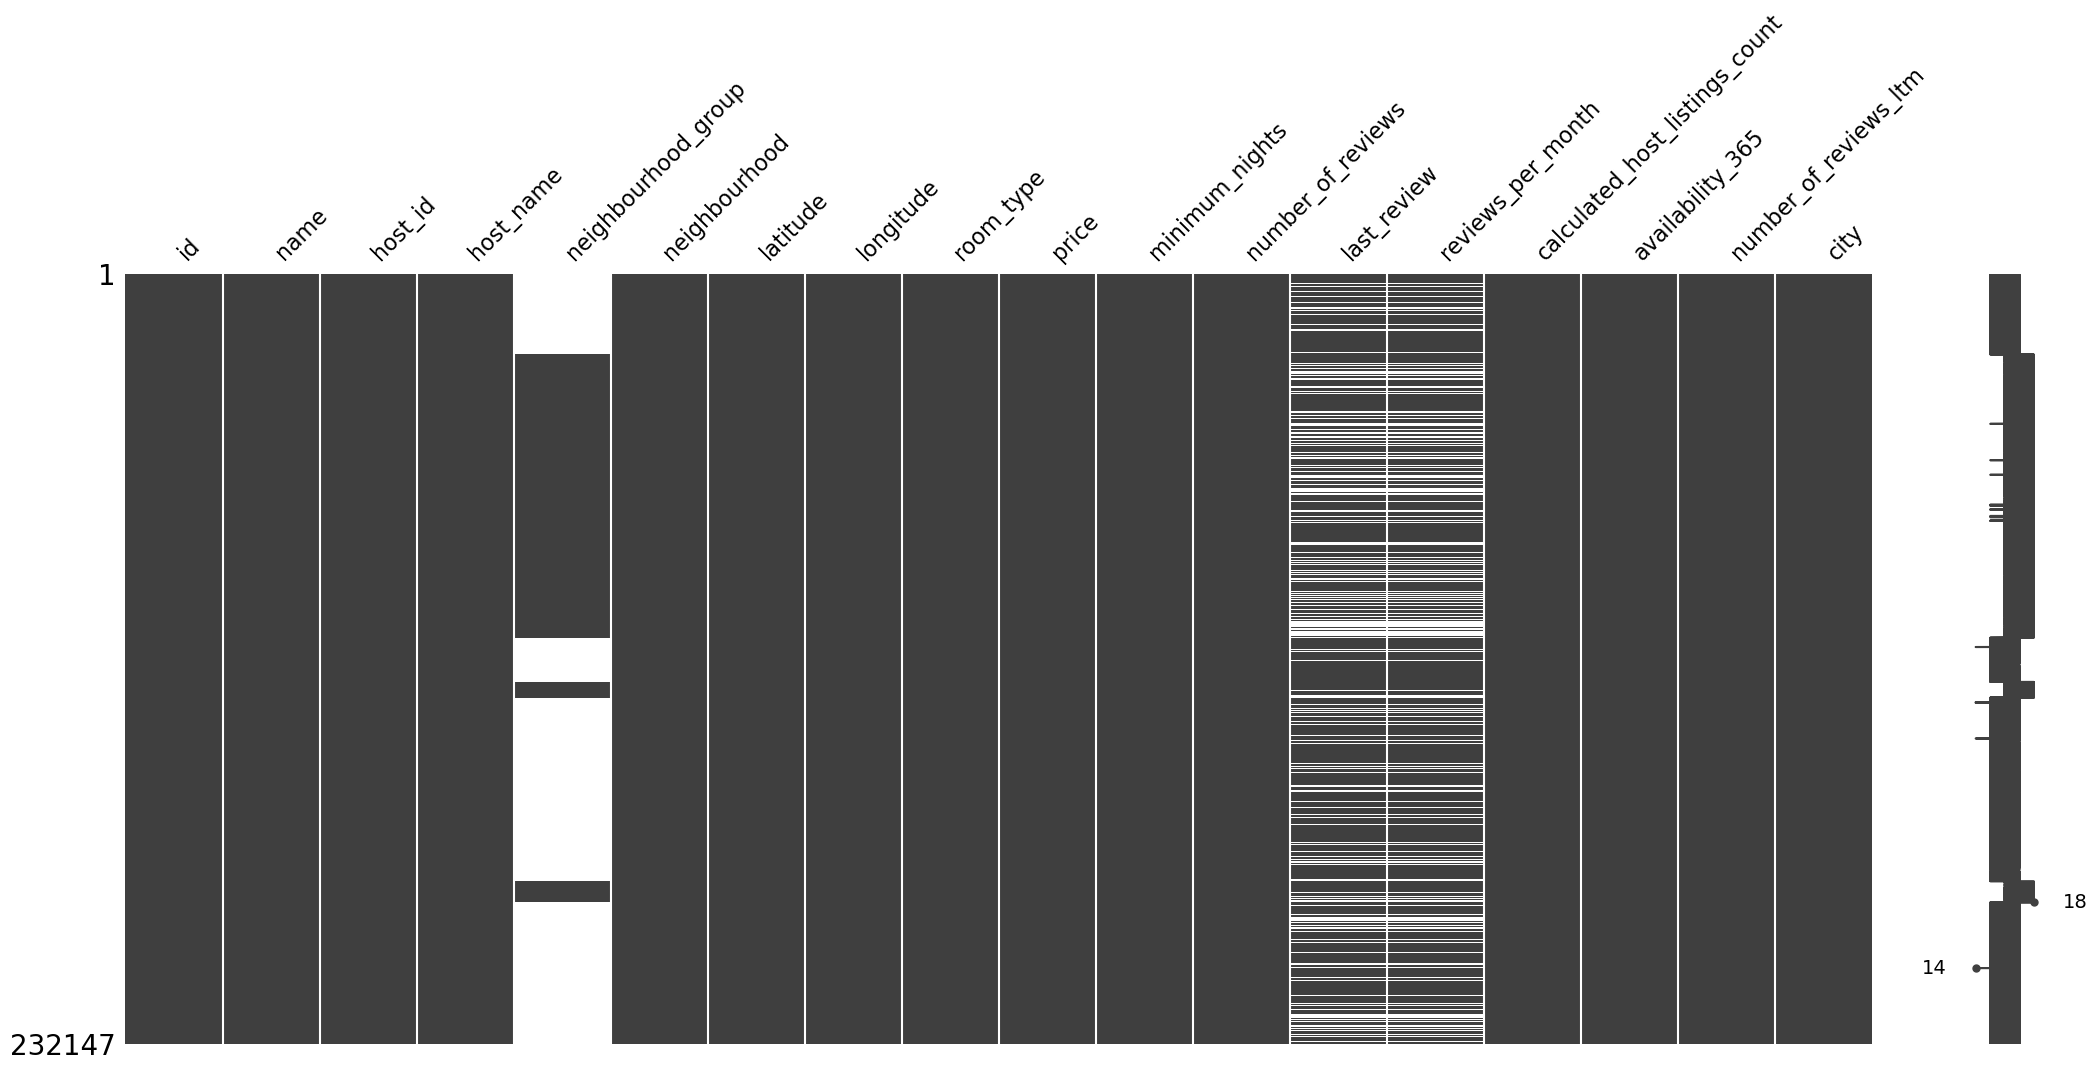

In [65]:
msno.matrix(df)
plt.show()

## Why is data missing?

### 1. Missing Completely at Random (MCAR)

**Definition:**
The probability that an observation is missing is the same for all units—i.e. missingness has **no relationship** to any observed or unobserved data.

**Implication:**
Dropping MCAR cases (complete‑case analysis) produces unbiased estimates, though with reduced power.

**Example scenarios:**

* A lab technician accidentally spills some blood samples at random, so those measurements are lost.
* A survey sheet is lost in the mail for a random subset of participants, irrespective of who they are or how they would have answered.

---

### 2. Missing at Random (MAR)

**Definition:**
The probability of missingness **may depend on observed data** but is independent of the unobserved (missing) values themselves, conditional on those observed data.

**Implication:**
If you correctly model (or condition on) the variables related to missingness, you can obtain unbiased estimates (e.g. via multiple imputation, inverse‑probability weighting).

**Example scenarios:**

* In a health survey, older participants are less likely to report their income, but among participants of the same age the chance of missing income doesn’t depend on their actual income level.
* Students with lower GPAs are less likely to fill out an optional feedback form, but within each GPA bracket, missingness doesn’t depend further on the specific feedback they would have given.

---

### 3. Missing Not at Random (MNAR)

**Definition:**
The probability of missingness **depends on the unobserved value itself**, even after accounting for all observed data.

**Implication:**
Standard methods (complete‑case, MAR‑based imputation) will generally be biased. You need specialized models (e.g. selection models, pattern‑mixture models) or strong assumptions to handle MNAR.

**Example scenarios:**

* In a depression questionnaire, patients with **more severe** symptoms are **less likely** to complete the survey (i.e. the missingness increases as the true depression score rises).
* People with **very high** incomes choose not to report their salary, even after conditioning on age, education, and occupation.

---

| Mechanism | Missingness depends on…       |   Bias if ignored?   | Typical remedy                 |
| :-------: | :---------------------------- | :------------------: | :----------------------------- |
|  **MCAR** | Nothing (purely random)       |          No          | Complete‑case                  |
|  **MAR**  | Observed data (e.g. age, GPA) | Yes (unless modeled) | Multiple imputation, weighting |
|  **MNAR** | Unobserved (missing) values   |          Yes         | MNAR‑specific models           |

---

### Key takeaway

* **MCAR** is the “best” (rarest) case: missingness is pure noise.
* **MAR** is common and manageable if you include the right predictors of missingness.
* **MNAR** is the hardest: you must explicitly model the missing‑data mechanism itself or invoke strong, unverifiable assumptions.


**What feature has the most missing data?
Are there any features that are missing in tandem?**

### 3. Examine the distribution of 'Price'.  

What is a typical price for an AirBnB rental?  What is the range of prices people charge for rentals?  Is the distribution of price skewed?  Let's make a boxplot and histogram of price.


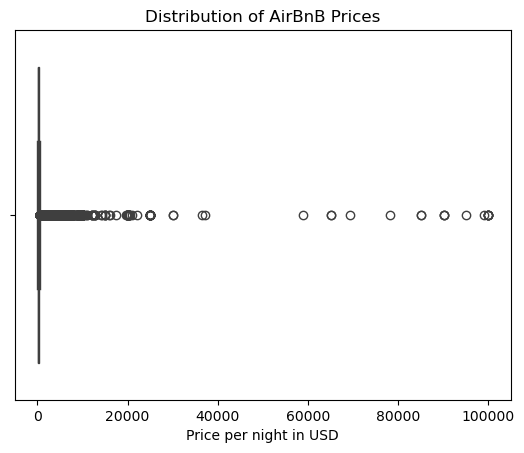

In [66]:
sns.boxplot(x='price', data=df)
plt.title('Distribution of AirBnB Prices')
plt.xlabel('Price per night in USD')
plt.show()

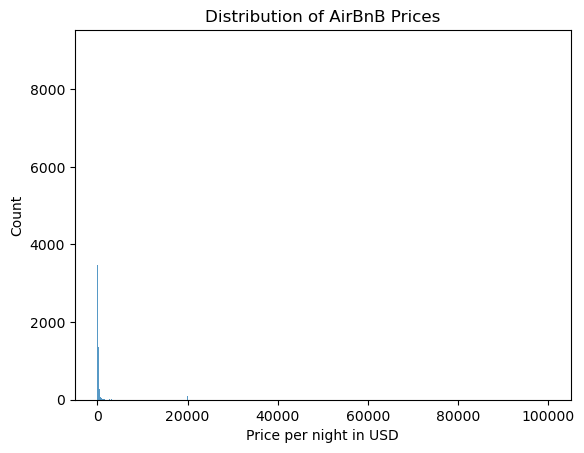

In [67]:
sns.histplot(x='price', data=df)
plt.title('Distribution of AirBnB Prices')
plt.xlabel('Price per night in USD')
plt.show()

In [68]:
import plotly.express as px

pricey = df.loc[df['price'] > 1000]

# build the figure
fig = px.scatter_mapbox(
    pricey,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    size_max=15,
    zoom=9,
    mapbox_style='open-street-map',
    hover_data='name',
    height=500,
    title='Unincorporated Neighborhood AirBnBs'
)

fig.show()

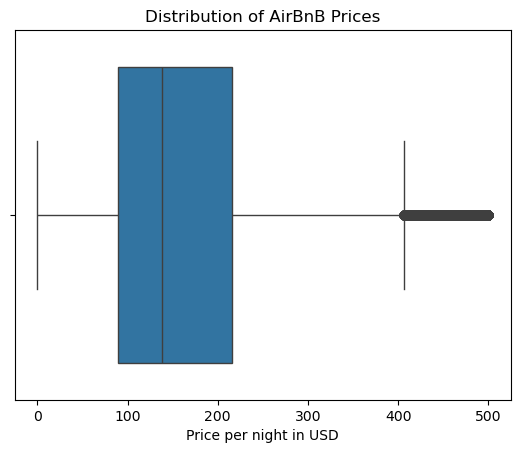

In [69]:
df['price'].describe()

df = df.loc[df['price'] <= 500]

sns.boxplot(x='price', data=df)
plt.title('Distribution of AirBnB Prices')
plt.xlabel('Price per night in USD')
plt.show()

### 4. Identify outliers

One thing is clear - there are some very expensive AirBnB listings out there!

Say we know our potential customers are likely to want to purchase a property that can be rented for less than $500 per night. 

Let's filter the data to remove very high priced listings and plot the distribution of price again.  Removing outliers isn't always the right thing to do; however, in this case, it makes sense.

In [70]:
warnings.filterwarnings('ignore', category=FutureWarning)

The distribution of AirBnB rentals under `$500` dollars is skewed to the right with a mean of `$163` and a median of `$138`. The price range is from `$0` to `$499.00`.



### 5. Understand the distribution of other catgorical and quantitative features.


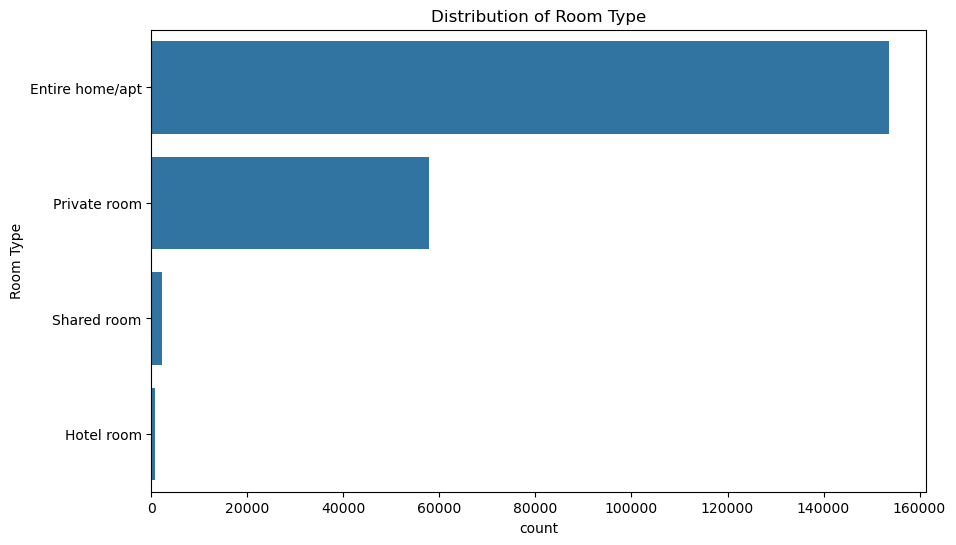

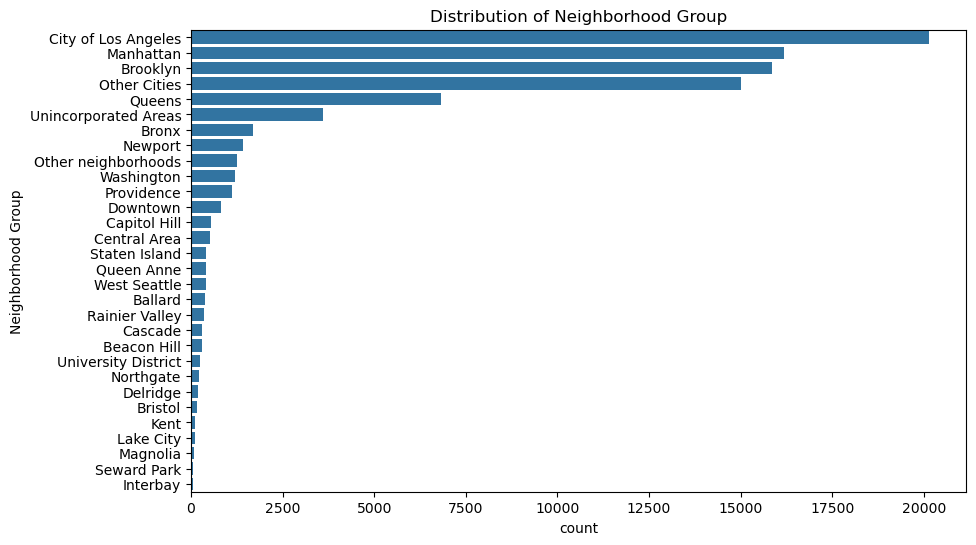

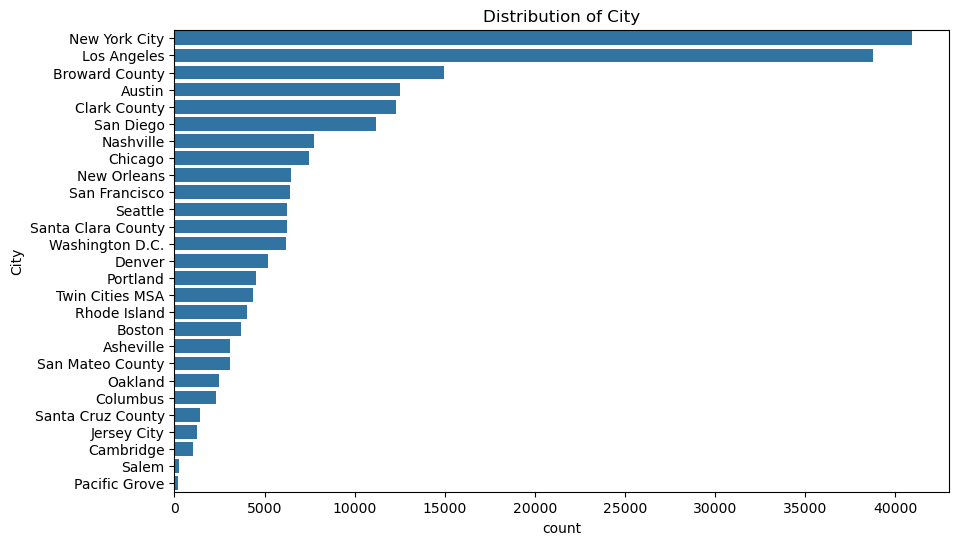

In [71]:
# Bar plots for key categorical variables
categorical_features = ['room_type', 'neighbourhood_group', 'city']

feature_titles = {
    'room_type': 'Room Type',
    'neighbourhood_group': 'Neighborhood Group',
    'city': 'City'
}

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    
    plt.title(f"Distribution of {feature_titles[feature]}")
    plt.ylabel(f"{feature_titles[feature]}")
    plt.show()

Most AirBnBs are entire apartment/houses or private rooms.  However there are some shared and hotel rooms available.

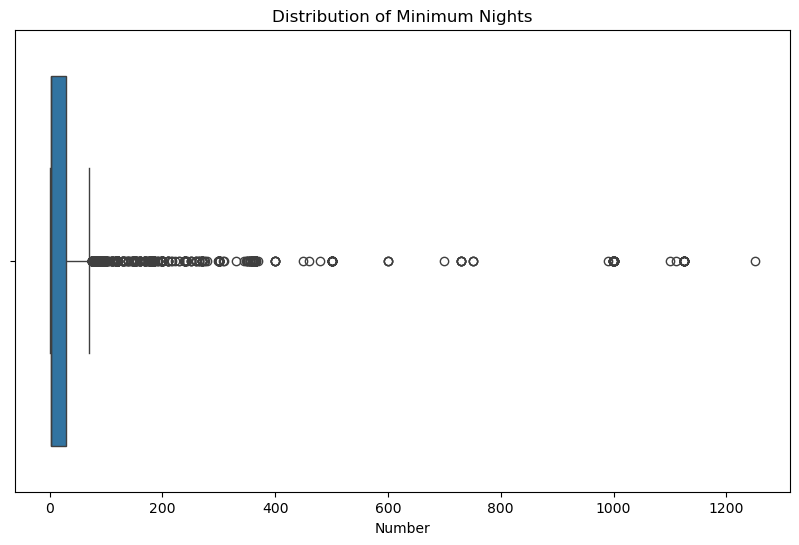

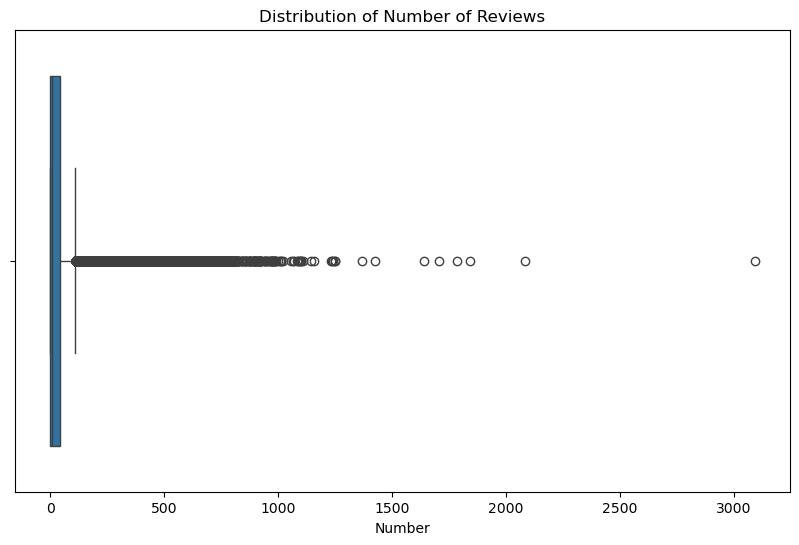

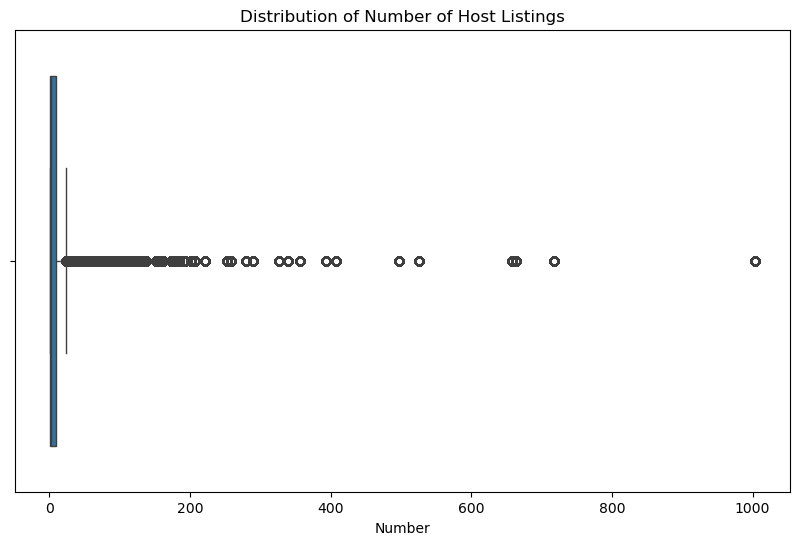

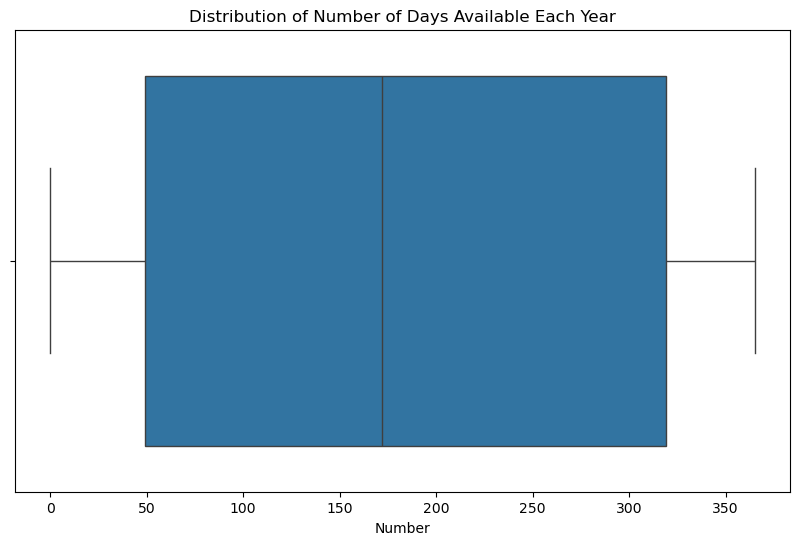

In [72]:
#Boxplots of quantitative features

quantitative_features = ['minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']

feature_titles = {
    'minimum_nights': 'Minimum Nights',
    'number_of_reviews': 'Number of Reviews',
    'calculated_host_listings_count': 'Number of Host Listings',
    'availability_365': 'Number of Days Available Each Year', 
    'number_of_reviews_ltm': 'Number of Reviews LTM'
}

for feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f"Distribution of {feature_titles[feature]}")
    plt.xlabel('Number')
    plt.show()



All of the features (except Available_365) are heavily skewed to the right where most properties have low values and a few have very high values.

Let's say you know your clients will want a place that is intended to be rented for - at most - a month at a time.  Let's filter the data once more so that the minimum nights is 31 or less.  

Your clients also know that they only want this to be a side-hustle, not something they do professionally, so it doesn't make sense to include listings owned by people or corporations that hold more than 10 properties.  Let's also filter the data so that the host listings count is 10 or less.

Then let's look at the distribution of price and other features again.

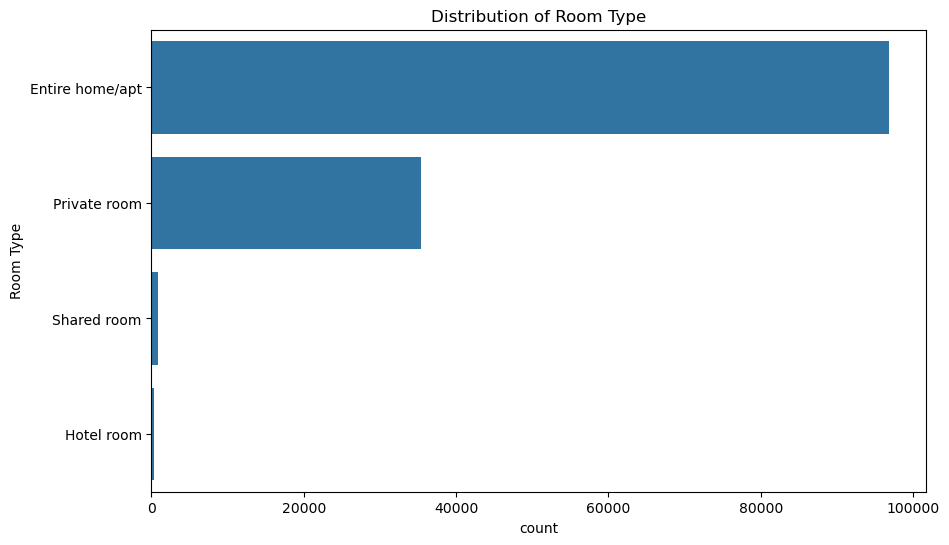

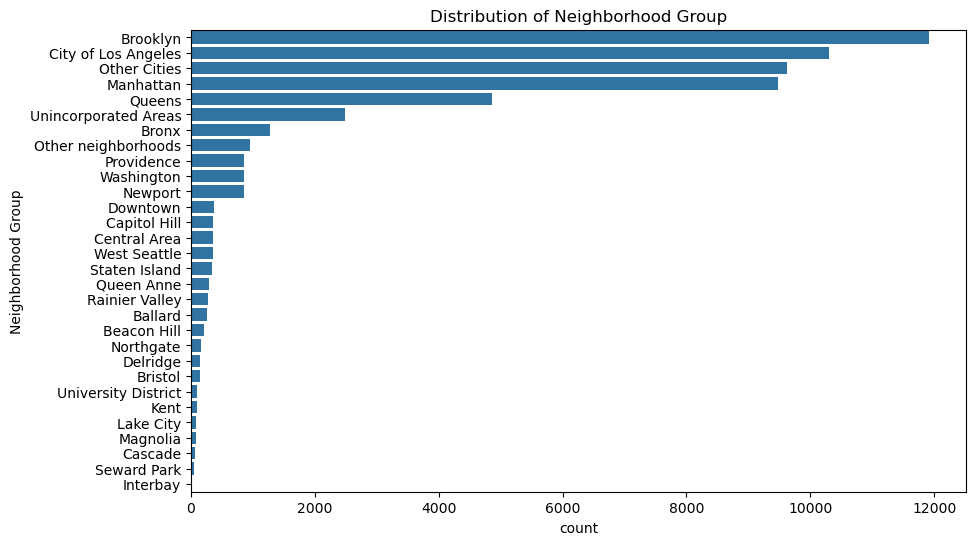

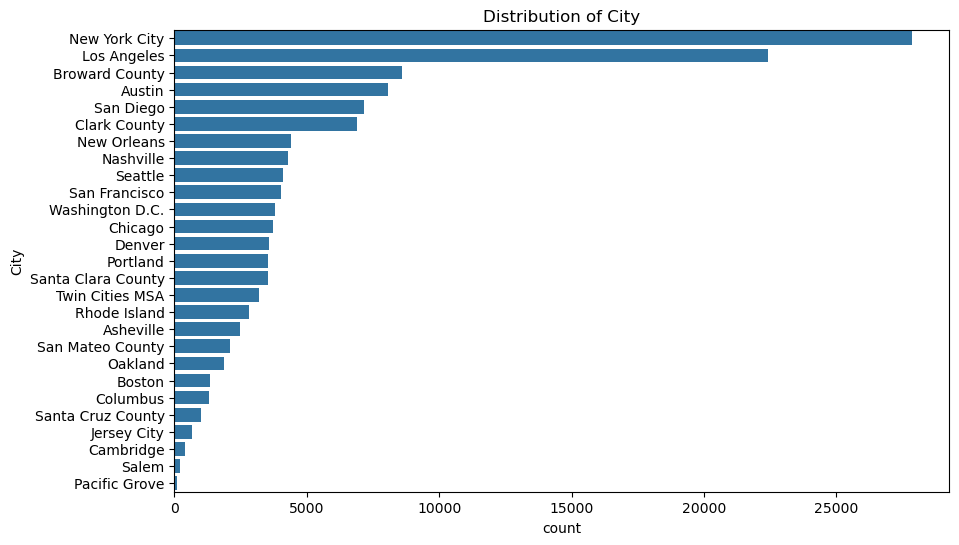

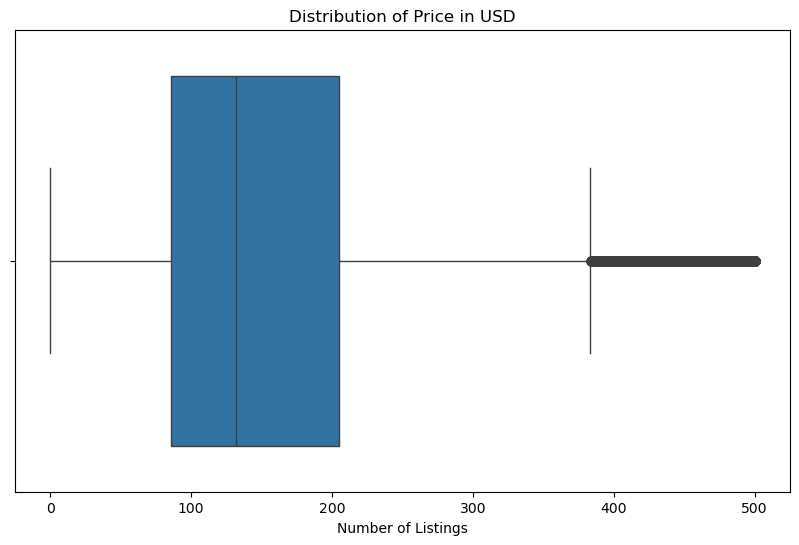

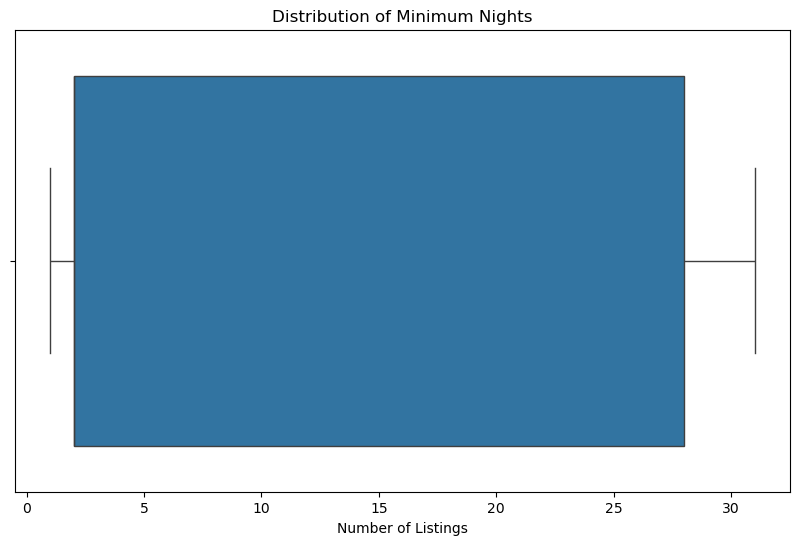

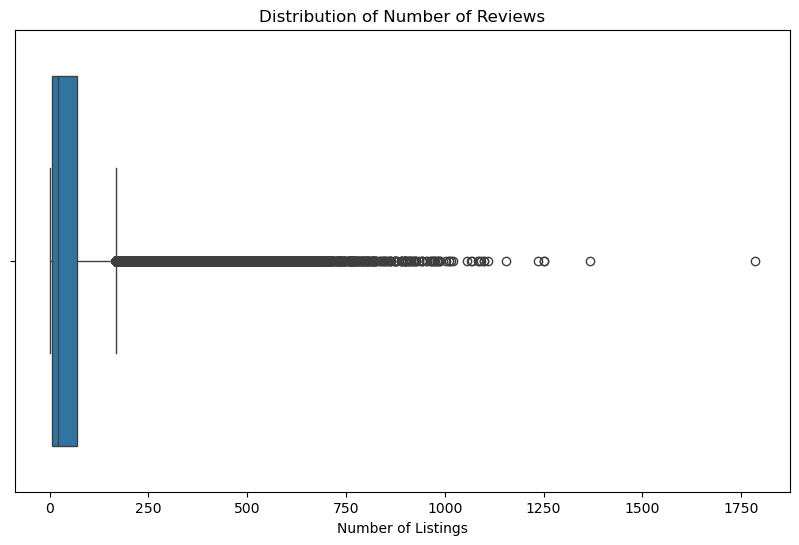

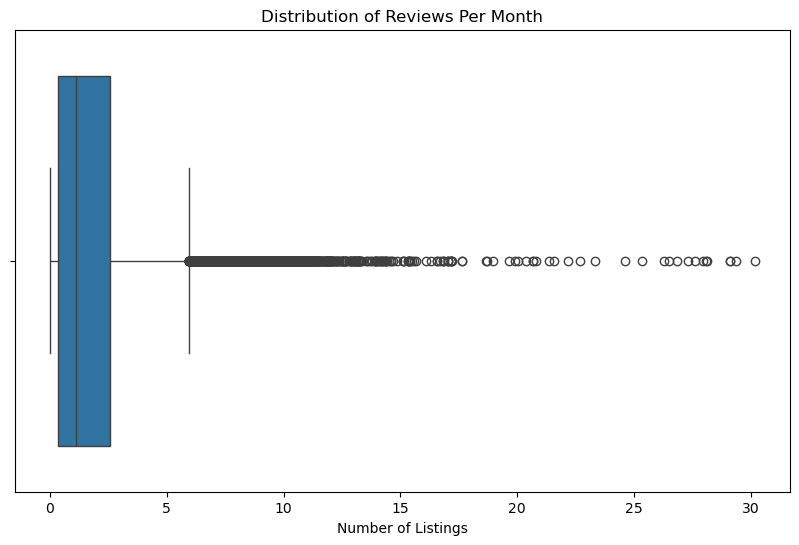

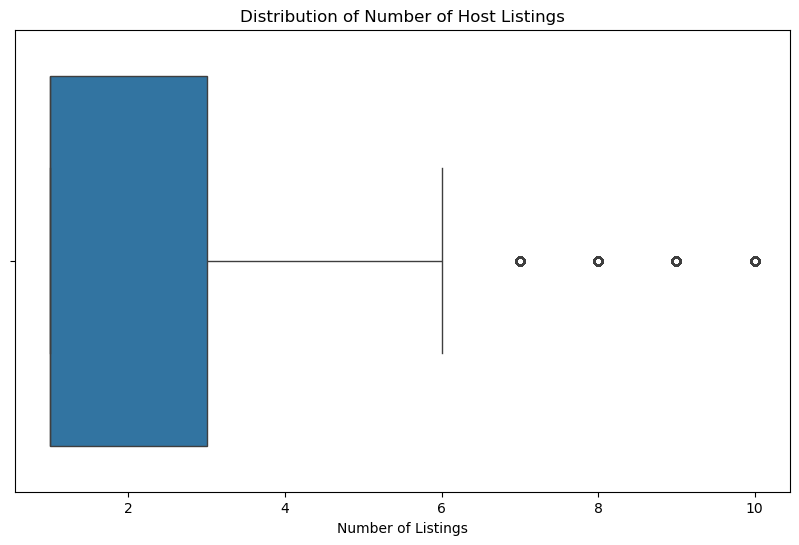

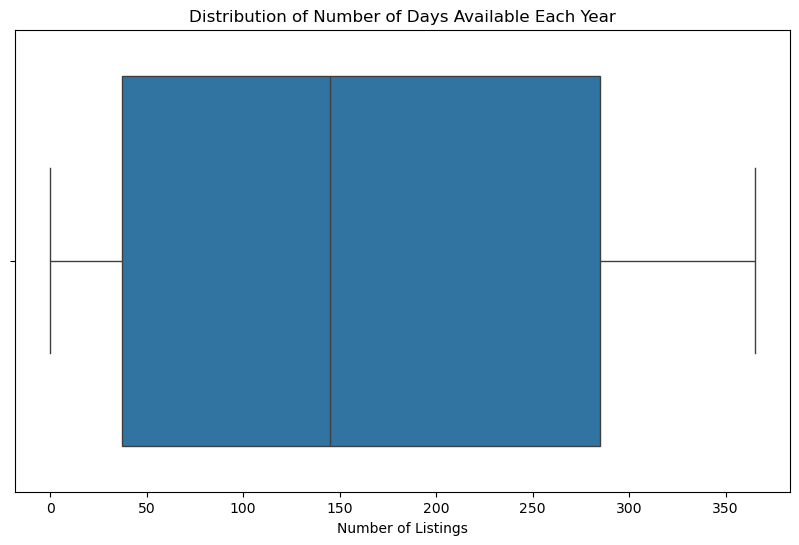

count    133512.000000
mean        160.255011
std         100.508350
min           0.000000
25%          86.000000
50%         132.000000
75%         205.000000
max         500.000000
Name: price, dtype: float64


In [73]:
df = df.loc[ (df['minimum_nights'] <= 31) & (df['calculated_host_listings_count'] <= 10) & (df['reviews_per_month'] <= 31)]

# Bar plots for key categorical variables
categorical_features = ['room_type', 'neighbourhood_group', 'city']

feature_titles = {
    'room_type': 'Room Type',
    'neighbourhood_group': 'Neighborhood Group',
    'city': 'City'
}

for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, y=feature, order=df[feature].value_counts().index)
    
    plt.title(f"Distribution of {feature_titles[feature]}")
    plt.ylabel(f"{feature_titles[feature]}")
    plt.show()
    
#Boxplots of quantitative feat
quantitative_features = ['price','minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

feature_titles = {
    'price': 'Price in USD',
    'minimum_nights': 'Minimum Nights',
    'number_of_reviews': 'Number of Reviews',
    'reviews_per_month': 'Reviews Per Month',
    'calculated_host_listings_count': 'Number of Host Listings',
    'availability_365': 'Number of Days Available Each Year', 
    'number_of_reviews_ltm': 'Number of Reviews'
}

for feature in quantitative_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=feature)
    plt.title(f"Distribution of {feature_titles[feature]}")
    plt.xlabel('Number of Listings')
    plt.show()
    
print(df['price'].describe())


Most listings that fit the criteria we established above are still entire homes and apartments with a few shared and hotel rooms.  Most of them are listed in NY City and LA.  The median number of nights listed is less than 5.  The mean price per night is `$160` and the median price is `$133`.  Most have less than 100 reviews and the distribution of the number of the number of available nights per year is evenly spread between 1 and 365.

In [74]:
df['minimum_nights'].describe()

count    133512.000000
mean          9.646024
std          12.237900
min           1.000000
25%           2.000000
50%           2.000000
75%          28.000000
max          31.000000
Name: minimum_nights, dtype: float64

### 6. Example the relationship of other features to price.

Now that we have the right dataset for the type of model we want to build, we can start looking at relationships in the data that are associated with price.  

In [75]:
df = df.loc[ (df['room_type'] == 'Entire home/apt')]

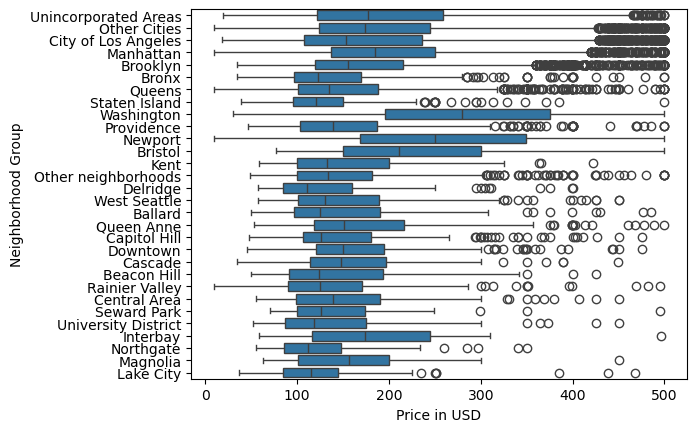

In [76]:
sns.boxplot(x='price', y='neighbourhood_group', data=df)
plt.ylabel('Neighborhood Group')
plt.xlabel('Price in USD')
plt.show()

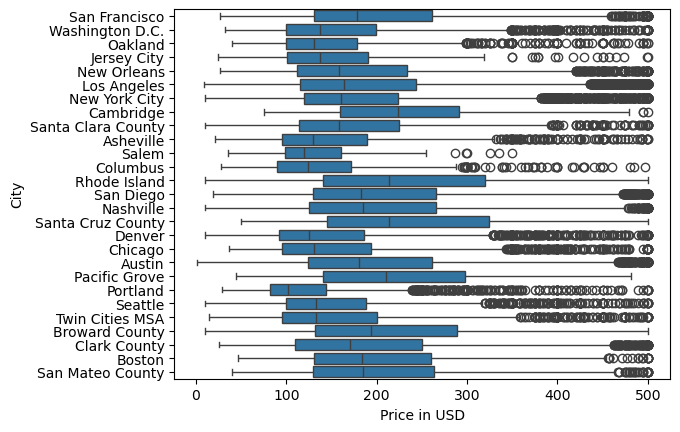

In [77]:
sns.boxplot(x='price', y='city', data=df)
plt.ylabel('City')
plt.xlabel('Price in USD')
plt.show()

The median price for a hotel room and for the entire house/apartment are higher than for either a private room or shared room.  Because the plots of price by neighborhood and city are so busy, it's hard to tell if one city/neighborhood commands a higher price than the others, though the higher median price for a rental in the Washington neighborhood look promising.

Because they command the highest price and are more straightforward to purchase, your clients want to focus specifically on entire house/apartment rentals.  Let's filter the data once more to only include listings that are a whole house/apartment.

If we look at all of the listings nationwide, there aren't any clear patterns between the minimum number of nights required, number of reviews, or number of days available and price.  It's possible that's because relationships exist specifically on a local level. 

**Earlier we saw that the median price in the Washington neighborhood was higher than the median price of other neighborhoods.  Let's focus on that.**

In [78]:
import plotly.io as pio

# switch to a compatible renderer
pio.renderers.default = 'plotly_mimetype'

import plotly.express as px
washington = df.loc[df['neighbourhood_group'] == 'Washington']

center_lat = washington['latitude'].mean()
center_lon = washington['longitude'].mean()

min_p, max_p = washington['price'].min(), washington['price'].max()

# build the figure
fig = px.scatter_mapbox(
    washington,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    range_color=[min_p, max_p],
    size_max=15,
    zoom=9,
    mapbox_style='open-street-map',
    center={'lat': center_lat, 'lon': center_lon},
    height=500,
    title='Washington Neighborhood AirBnBs'
)

fig.show()

In [79]:
import plotly.express as px
areas = df[df['neighbourhood_group'] == 'Unincorporated Areas']

center_lat = areas['latitude'].mean()
center_lon = areas['longitude'].mean()

min_p, max_p = areas['price'].min(), areas['price'].max()

# build the figure
fig = px.scatter_mapbox(
    areas,
    lat='latitude',
    lon='longitude',
    color='price',
    size='price',
    range_color=[min_p, max_p],
    size_max=15,
    zoom=9,
    mapbox_style='open-street-map',
    center={'lat': center_lat, 'lon': center_lon},
    height=500,
    title='Unincorporated Neighborhood AirBnBs'
)

fig.show()


Now we see a few patterns emerging.  Listings with a minimum stay under about 7 days tend to command higher prices.  There is a curved relationship between number of reviews and prices where inexpensive rentals get a lot of reviews.  There doesn't seem to be any relationship between price and availability.

Now that we've focused on a single geographic area, we can zoom in and see how prices differ within the Washington neighborhood.

It looks like many of the highest priced rentals are along the coast or on the little island.

Finally, we can see if there are any differences in the wording of the listings of higher (above the 75th percentile) and lower (< 25th percentile) price ranges.

High-priced listings:


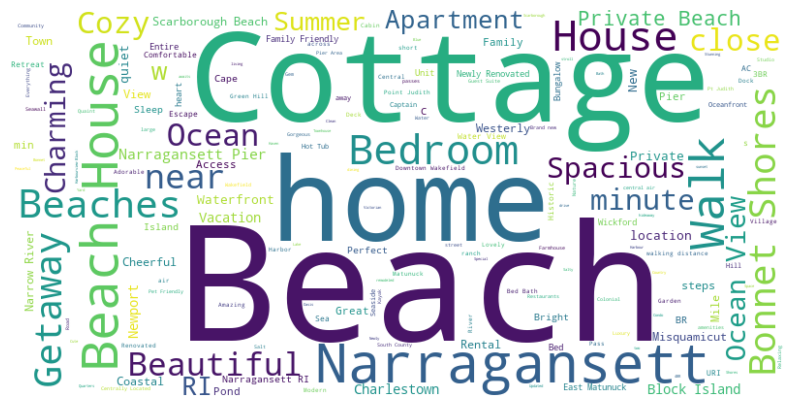

Low-priced listings:


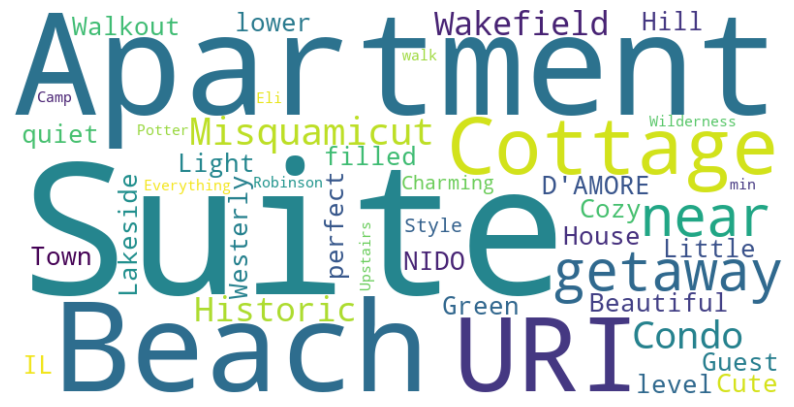

In [80]:
#Examining the text in the listing names using a word cloud

from wordcloud import WordCloud

# Create word cloud for 'description' column
# This sticks the text of all the positive reviews together and all the negative reviews together in two long strings separated by spaces
high_price = ' '.join(washington[washington['price'] > 207]['name'].astype(str))
low_price = ' '.join(washington[washington['price'] <= 85]['name'].astype(str))


print("High-priced listings:")
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(high_price)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


print("Low-priced listings:")
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(low_price)
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


What recommendations would you give to the client we described in this scenario?

## OK
We've reviewed many ways of visualizing data and discussed how they are important in preparing our data to be used in machine learning model.  EDA is an important and very involved part of the field of data science.